In [81]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
#plt.rcParams['image.cmap']='gray'

In [82]:
iris = load_iris()

In [83]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [84]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
df['target'] = iris.target

In [86]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [87]:
train_df =df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [88]:
tsne = TSNE(n_components=2, random_state=0)
tsne_np = tsne.fit_transform(train_df)

c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [89]:
tsne_df = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])

In [90]:
tsne_df.head()

,component 0,component 1
0,15.894640,19.289463
1,15.950038,21.958372
2,14.836510,21.707766
3,14.991577,22.114239
4,15.799398,19.304255


- 2차원으로 축소한 데이터 시각화
    - t-sne 2차원 데이터 시각화

In [91]:
tsne_df['target'] = df['target']

#target별 분리
tsne_df_0 = tsne_df[tsne_df['target']==0]
tsne_df_1=tsne_df[tsne_df['target']==1]
tsne_df_2=tsne_df[tsne_df['target']==2]

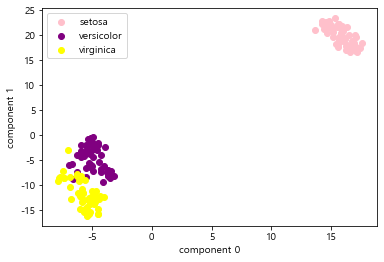

In [92]:
#target별 시각화
import colorsys


plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label='setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color ='purple', label='versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label='virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

- 2차원 공간에 꽃 종류별로 구분이 잘 되어 임베딩 됨

##### 3차원 시각화

In [93]:
tsne = TSNE(n_components=3)
tsne_np = tsne.fit_transform(train_df)

c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [94]:
#numpy형태 df형태로 변환
tsne_df = pd.DataFrame(tsne_np, columns=['component 0', 'component 1', 'component 2'])

In [95]:
tsne_df.head()

,component 0,component 1,component 2
0,66.579895,-49.968651,105.568611
1,80.123253,-2.307744,19.739407
2,150.890274,-21.734158,-0.147089
3,92.568054,19.448492,55.577446
4,65.476982,-78.761032,74.868713


In [96]:
tsne_df['target']=df['target']

In [97]:
tsne_df.head()

,component 0,component 1,component 2,target
0,66.579895,-49.968651,105.568611,0
1,80.123253,-2.307744,19.739407,0
2,150.890274,-21.734158,-0.147089,0
3,92.568054,19.448492,55.577446,0
4,65.476982,-78.761032,74.868713,0


In [98]:
from mpl_toolkits.mplot3d import Axes3D

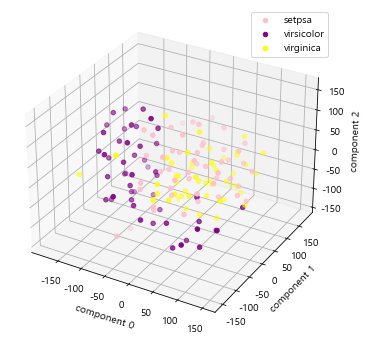

In [99]:
#3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

tsne_df_0=tsne_df[tsne_df['target']==0]
tsne_df_1=tsne_df[tsne_df['target']==1]
tsne_df_2=tsne_df[tsne_df['target']==2]

ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label='setpsa')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color='purple', label='virsicolor')
ax.scatter(tsne_df_2['component 0'],tsne_df_2['component 1'], tsne_df_2['component 2'], color ='yellow', label='virginica')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()